# Demonstration of discrete HMMs with Categorical or Independent Bernoulli emissions

In [1]:
# Import stuff
import numpy as np
import DiscreteHMM

%matplotlib inline
import pylab as plt

In [2]:
# Make some categorical data. 2 sequences of data with 3 emissions (0, 1, or 2). 2 states in the data, with the 
# states switching at 100 and 200 on both sequences
# Emission probabilities on state 0 - [1/3, 1/3, 1/3]
# Emission probabilities on state 1 - [1/6, 2/3, 1/6]
data = np.zeros((2,300))
data[0, :100] = np.random.choice(np.arange(3), size = 100, p = [1/3, 1/3, 1/3])
data[0, 100:200] = np.random.choice(np.arange(3), size = 100, p =  [1/6, 2/3, 1/6])
data[0, 200:] = np.random.choice(np.arange(3), size = 100, p = [1/3, 1/3, 1/3])
data[1, :100] = np.random.choice(np.arange(3), size = 100, p =  [1/3, 1/3, 1/3])
data[1, 100:200] = np.random.choice(np.arange(3), size = 100, p =  [1/6, 2/3, 1/6])
data[1, 200:] = np.random.choice(np.arange(3), size = 100, p =  [1/3, 1/3, 1/3])

In [3]:
# Make a CategoricalHMM model
model = DiscreteHMM.CategoricalHMM(num_states = 2, num_emissions = 3, max_iter = 1000, threshold = 1e-6)

In [4]:
# Fit with very weak priors. Just 1 pseudocount, probably ok for start probabilities, but likely more pseudocounts
# needed for the transition and emission probabilities
model.fit(data=data, p_transitions=np.random.random(size=(2, 2)), p_emissions=np.random.random(size=(2, 3)), 
          p_start=np.random.random(2), transition_pseudocounts=np.ones((2, 2)), emission_pseudocounts=np.ones((2, 3)), 
          start_pseudocounts=np.ones(2), verbose = False)

In [5]:
model.converged

True

In [6]:
model.p_emissions

array([[ 0.37017602,  0.327788  ,  0.30203598],
       [ 0.13840717,  0.6977888 ,  0.16380403]])

In [7]:
# Get the posterior probabilities of the states from the E step
alpha, beta, scaling, expected_latent_state, expected_latent_state_pair = model.E_step()

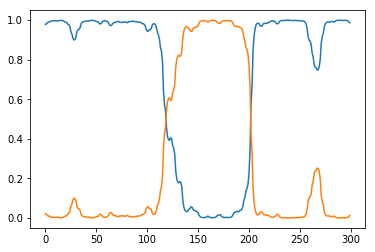

In [8]:
plt.plot(expected_latent_state[:, 0, :].T)

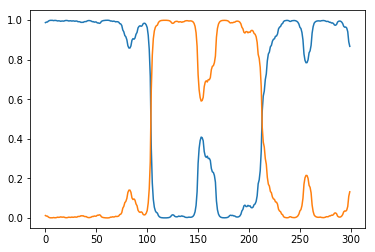

In [9]:
plt.plot(expected_latent_state[:, 1, :].T)

In [10]:
# Make some Bernoulli data. 2 sequences of data with 3 independent Bernoulli emissions. 2 states in the data, with the 
# states switching at 100 and 200 on both sequences
# Probability of emitting 1 on state 0 - [1/3, 1/3, 1/3]
# Probability of emitting 1 on state 1 - [1/6, 2/3, 1/6]
data = np.zeros((3, 2, 300)) 
p = np.array([[1/3, 1/3, 1/3], [1/6, 2/3, 1/6]])
# state 0 runs from 0-100
for i in range(2):                                           
    for j in range(100):                                              
        for k in range(3):                                            
            data[k, i, j] = np.random.binomial(1, p[0, k])
# state 1 runs from 100-200
for i in range(2):                                           
    for j in range(100):                                              
        for k in range(3):                                            
            data[k, i, j+100] = np.random.binomial(1, p[1, k])
# state 0 runs from 200-300
for i in range(2):                                           
    for j in range(100):                                              
        for k in range(3):                                            
            data[k, i, j+200] = np.random.binomial(1, p[0, k])

In [11]:
# Make an IndependentBernoulliHMM model
model = DiscreteHMM.IndependentBernoulliHMM(num_states = 2, num_emissions = 3, max_iter = 1000, threshold = 1e-6)

In [12]:
# Fit with very weak priors. Just 1 pseudocount, probably ok for start probabilities, but likely more pseudocounts
# needed for the transition and emission probabilities
model.fit(data=data, p_transitions=np.random.random(size=(2, 2)), p_emissions=np.random.random(size=(2, 3)), 
          p_start=np.random.random(2), transition_pseudocounts=np.ones((2, 2)), emission_pseudocounts=np.ones((2, 3, 2)), 
          start_pseudocounts=np.ones(2), verbose = False)

In [13]:
model.converged

True

In [14]:
model.p_emissions

array([[ 0.27411039,  0.30304635,  0.30152509],
       [ 0.19147715,  0.65208549,  0.18118166]])

In [15]:
# Get the posterior probabilities of the states from the E step
alpha, beta, scaling, expected_latent_state, expected_latent_state_pair = model.E_step()

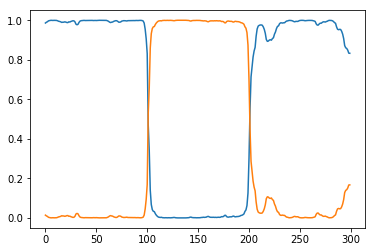

In [16]:
plt.plot(expected_latent_state[:, 0, :].T)

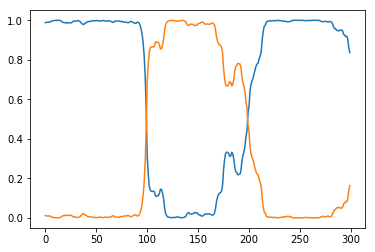

In [17]:
plt.plot(expected_latent_state[:, 1, :].T)